In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required library modules

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset
There were two datasets avalaible. We'll just get an idea about basic info of each dataset and further proceed with one of them.

In [86]:
train = pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")
t_train = pd.read_csv("/content/drive/MyDrive/Asteroid.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
t_train.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [88]:
train.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [89]:
train['diameter']

0           939.4
1             545
2         246.596
3           525.4
4         106.699
           ...   
839709        NaN
839710        NaN
839711        NaN
839712        NaN
839713        NaN
Name: diameter, Length: 839714, dtype: object

It's important to understand what values we are analysing to predict the diameter of system. The table below shows the column values name that we are using in our dataset.

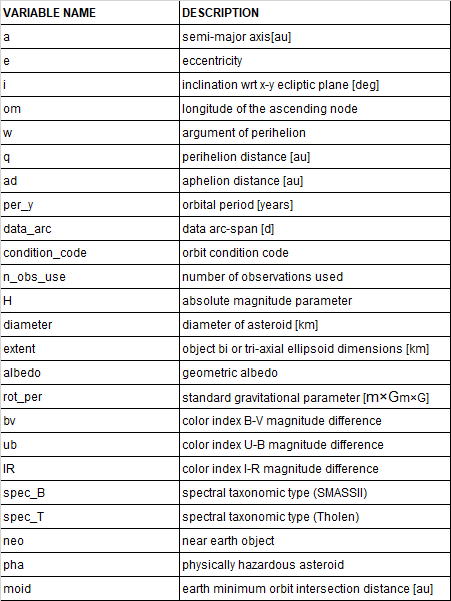

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [91]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

We choose the Asteroid_updated dataset because it has more no of numeric columns that we could use to train our data.

# Cleaning the dataset

In this section we will try to clean our existing data set to make it fit for training our model and perform EDA. We will be dropping unuseful column, replace missing vales and organise our data better.

In [92]:
## Finding missing values in terms of percentage to get a better idea
100 * train.isnull().mean()

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

Based on the observation of missing values, we could drop columns with more than 80% missing values except for the diameter column. We can also note a significant number of diameter missing values. We won't be able to use these missing values to train our data so we drop those those columns.

In [93]:
drop_col = ['albedo','name','rot_per','spec_B',
             'BV','spec_T','UB','G',
             'extent','GM','IR']
train.drop(drop_col, axis=1, inplace=True)

#There were originally 31 columns, test that there are only 19.
len(train.columns)

20

In [94]:
train = train.sample(frac=0.6)

As we have not been given test data separately, we will use the rows with null diameter values as our test data.

In [95]:
test = train[train['diameter'].isna()]

In [96]:
train = train.dropna(axis=0, subset=['diameter'])

In [97]:
## Finding length of of remaining rows after removing null diameter
len(train.index)

82367

### Object to float/numeric conversion¶

In [98]:
# converting diameter from object to float value
train['diameter'] = train.diameter.astype(float)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82367 entries, 347325 to 22376
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               82367 non-null  float64
 1   e               82367 non-null  float64
 2   i               82367 non-null  float64
 3   om              82367 non-null  float64
 4   w               82367 non-null  float64
 5   q               82367 non-null  float64
 6   ad              82367 non-null  float64
 7   per_y           82367 non-null  float64
 8   data_arc        82287 non-null  float64
 9   condition_code  82367 non-null  object 
 10  n_obs_used      82367 non-null  int64  
 11  H               81940 non-null  float64
 12  neo             82367 non-null  object 
 13  pha             82367 non-null  object 
 14  diameter        82367 non-null  float64
 15  moid            82367 non-null  float64
 16  class           82367 non-null  object 
 17  n               82367 non-

We would want to convert class, neo, pha, condition_code columns values to numeric form. For that we first get an idea of the unique string/character values stored in these columns and represent them with integer values.

In [100]:
train.neo.unique()

array(['N', 'Y'], dtype=object)

In [101]:
train['neo'].value_counts()

N    81826
Y      541
Name: neo, dtype: int64

In [102]:
train['pha'].value_counts()

N    82222
Y      145
Name: pha, dtype: int64

In [103]:
train['class'].value_counts()

MBA    75608
OMB     4472
TJN     1149
IMB      353
APO      305
MCA      202
AMO      175
ATE       61
CEN       29
TNO        8
AST        5
Name: class, dtype: int64

In [104]:
train['condition_code'].value_counts()

0      75565
9       3308
0       1204
1        515
9.0      504
1.0      335
2        182
5        161
6         95
4         82
3         77
7         72
5.0       56
2         52
7.0       44
8         37
4.0       22
6.0       21
3.0       20
8.0       15
Name: condition_code, dtype: int64

It can be observed for the condition_code column that the unique values we get after using value_counts are reapeated too(like 5.0 and 5 are mentioned separately) so we use "pd.to_numeric" to convert it in one form only.This could be due to inconsistency in the dataset. Like there could be integers, floats, and strings values. We created a consistent column below.

In [105]:
train.condition_code = pd.to_numeric(train.condition_code, errors='coerce')

### Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder
cols = ['neo', 'pha','class']
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])
    
train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,moid,class,n,per,ma
347325,3.179465,0.088972,16.301669,207.850911,44.985869,2.896580,3.462350,5.669429,9354.0,0.0,216,15.1,0,0,5.465,1.90764,6,0.173849,2070.758972,239.657510
71702,3.093778,0.088763,9.503377,183.180539,257.484296,2.819164,3.368392,5.441792,8145.0,0.0,855,14.4,0,0,4.929,1.85389,6,0.181122,1987.614531,284.008178
95192,2.733944,0.026912,5.889198,168.199973,64.858846,2.660369,2.807519,4.520563,9929.0,0.0,603,15.3,0,0,5.097,1.65634,6,0.218032,1651.135645,202.034460
248355,3.132874,0.252243,8.606522,266.360427,114.781251,2.342628,3.923120,5.545269,8928.0,0.0,315,15.4,0,0,5.213,1.36119,6,0.177742,2025.409520,149.588516
277285,2.980507,0.108970,12.754065,209.164359,213.580043,2.655722,3.305292,5.145688,8191.0,0.0,156,16.3,0,0,3.168,1.67658,6,0.191544,1879.462587,198.369863


## Missing values filling

In [107]:
train.isnull().sum()

a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc           80
condition_code      0
n_obs_used          0
H                 427
neo                 0
pha                 0
diameter            0
moid                0
class               0
n                   0
per                 0
ma                  0
dtype: int64

We can see some missing values in data_arc, so we try to fill in those values after observing our data.

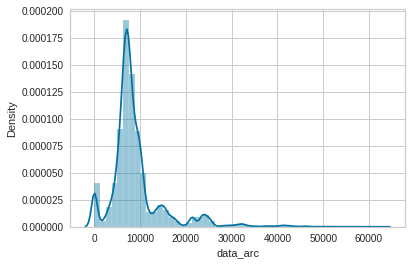

In [108]:
sns.distplot(train['data_arc'])

So data_arc has a skewed plot. It is positively skewed so we can't use mean values to replace existing values. Hence we go for median.

In [109]:
train['data_arc']

347325     9354.0
71702      8145.0
95192      9929.0
248355     8928.0
277285     8191.0
           ...   
23200     13444.0
67153      7521.0
241237     7739.0
237929     6900.0
22376      9518.0
Name: data_arc, Length: 82367, dtype: float64

In [110]:
train['data_arc'] = train['data_arc'].fillna(train['data_arc'].median())


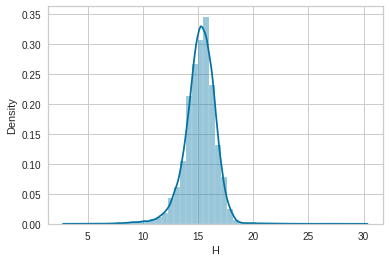

In [111]:
sns.distplot(train['H'])

In [112]:
train['H'] = train['H'].fillna(train['H'].mean())


# Exploratory Data Analysis

In this section, we visualise our data by plotting various graphs and relate values present in the given columns with the diameter.

In [113]:
## diameter describing - doubt-why not giving min, max values
train['diameter'].describe()

count    82367.000000
mean         5.493596
std          9.255883
min          0.002500
25%          2.778000
50%          3.956000
75%          5.753000
max        900.000000
Name: diameter, dtype: float64

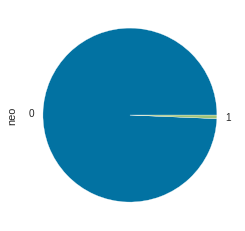

In [114]:
#calculate the percentage of neo.
train.neo.value_counts(normalize=True)

#plot the pie chart for better understanding
train.neo.value_counts(normalize=True).plot.pie()
plt.show()

We can observe that for neo as well as pha, N value comprises of a major portion which is more than 90% for both cases. 
This observation depicts that the number of near earth asteroids are very less, and hazardous object are even lesser.

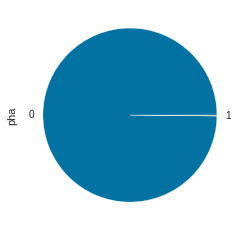

In [115]:
#calculate the percentage of pha.
train.pha.value_counts(normalize=True)

#plot the pie chart for better understanding
train.pha.value_counts(normalize=True).plot.pie()
plt.show()

Whether an asteroid is near earth or hazardous has no role in determining the diameter of the asteroid. So we drop these columns for our prediction.

In [116]:
drop_col = ['neo', 'pha']
train.drop(drop_col, axis=1, inplace=True)

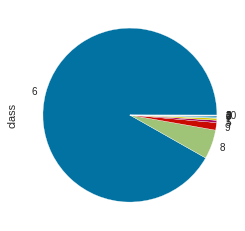

In [117]:
train['class'].value_counts(normalize=True)

#plot the pie chart for better understanding
train['class'].value_counts(normalize=True).plot.pie()
plt.show()

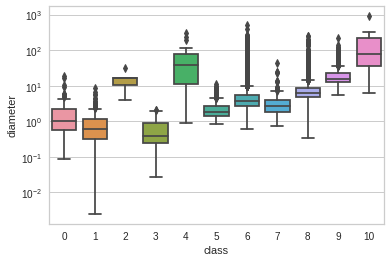

In [118]:
sns.boxplot(x='class', y='diameter', data=train)
plt.yscale('log');

We used the box plot here to get the median values of diameters wrt class. Y has been taken on a log scale as the result obtained without it weren't very clear to observe.

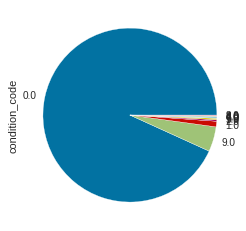

In [119]:
train['condition_code'].value_counts(normalize=True)

#plot the pie chart for better understanding
train['condition_code'].value_counts(normalize=True).plot.pie()
plt.show()

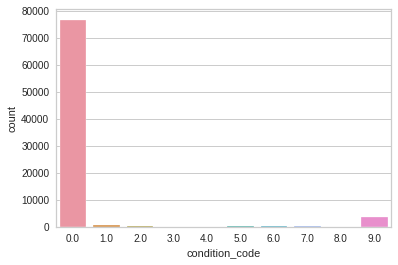

In [120]:
# count plot to get an idea of count values according to condition code
sns.countplot(train['condition_code'])

The condition_code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

I have used scatter plot for identifying reltaionship of various aspects with columns as it is easy to observe any outliers, if present.

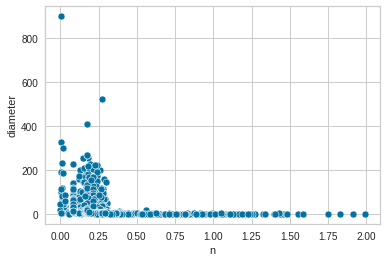

In [121]:
sns.scatterplot(train["n"],train["diameter"])

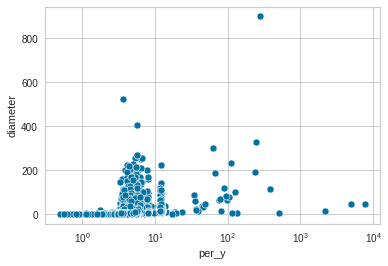

In [122]:
sns.scatterplot(train["per_y"],train["diameter"])

plt.xscale('log');

Figure shows relation of orbital period with diameter.

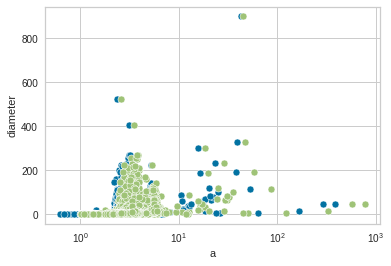

In [123]:
col = ["a","ad"]
for j in col: 
  sns.scatterplot(train[j],train["diameter"])
  plt.xscale('log');

We can observe that a, ad almost have the same plot and can see some overlapping. 

*Tried plotting two graphs, how to plot separate graph in loop?

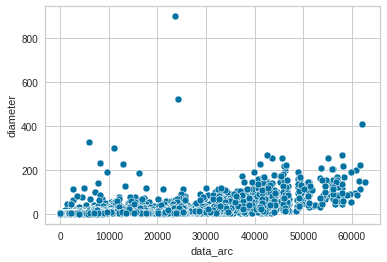

In [124]:
sns.scatterplot(train["data_arc"],train["diameter"])
#plt.xscale('log');

Above graph shows that data_arc values spread through the entire range of diameter and has a realation with it.

In [125]:
# to observe how skewed values are
train.skew()

a                 157.874691
e                   1.406005
i                   1.652007
om                  0.188901
w                  -0.025761
q                   9.566949
ad                172.019309
per_y             199.972794
data_arc            2.644718
condition_code      4.020622
n_obs_used          1.325624
H                  -0.659904
diameter           23.972626
moid                9.894692
class              -0.841644
n                   6.089675
per               199.972794
ma                 -0.064310
dtype: float64

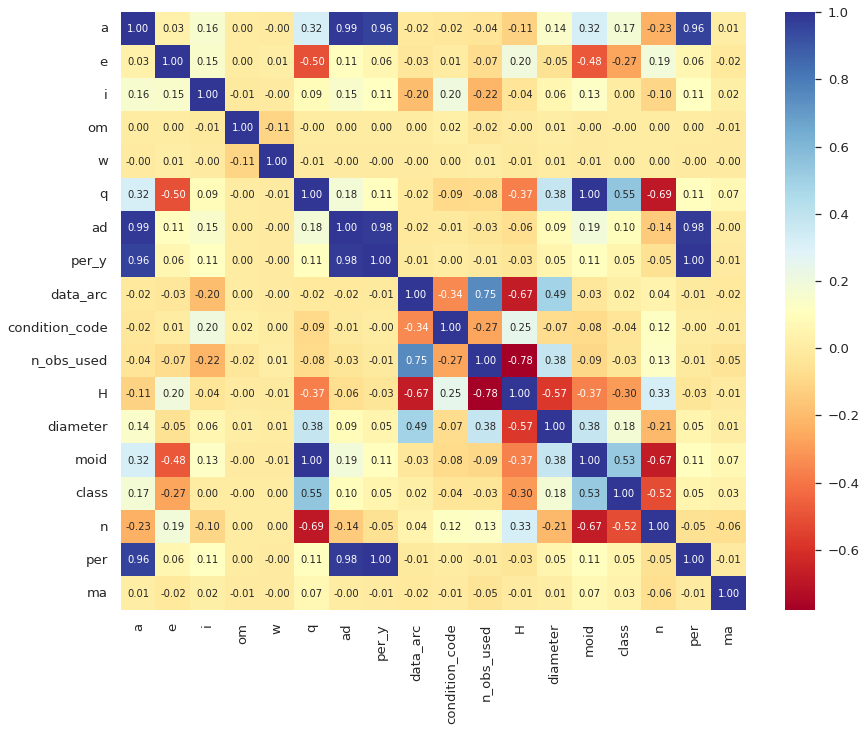

In [126]:
plt.figure(figsize=(14,11))
sns.set(font_scale=1.2)
sns.heatmap(train.corr(),annot=True, cmap='RdYlBu',fmt='.2f', annot_kws={'size':10});

Based on the above figure, it can be observed that columns a,ad and per, per_y are highly related. We try to see similarity between them using graphs and remove columns if two of them are very related.

In [127]:
#df = train[['per', 'per_y','a','ad']]
#sns.pairplot(df)

per, per_y plots have points on line y=x. Hence because of relating so much we can remove one column per, ad(very related to a).

In [128]:
train.drop('per', axis=1, inplace=True)

In [129]:
train.drop('ad',axis=1,inplace= True)

q and moid are also very related to diamter so can drop one of those values too.

In [130]:
train.drop('q', axis=1, inplace=True)

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82367 entries, 347325 to 22376
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               82367 non-null  float64
 1   e               82367 non-null  float64
 2   i               82367 non-null  float64
 3   om              82367 non-null  float64
 4   w               82367 non-null  float64
 5   per_y           82367 non-null  float64
 6   data_arc        82367 non-null  float64
 7   condition_code  82367 non-null  float64
 8   n_obs_used      82367 non-null  int64  
 9   H               82367 non-null  float64
 10  diameter        82367 non-null  float64
 11  moid            82367 non-null  float64
 12  class           82367 non-null  int64  
 13  n               82367 non-null  float64
 14  ma              82367 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 12.1 MB


In [132]:
# method to plot selected columns
#dis = train[['e', 'i','om','w','q','ma']]
#dis.hist(figsize=(14,11));
#plt.show;

doubt: randomly chooses x axis values? (above plot)

## Outlier detection and compensation

We try to detect major outliers in our dataset that can significantly impact our data and treat those outliers.

om       AxesSubplot(0.125,0.772143;0.110714x0.107857)
w     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
ma    AxesSubplot(0.390714,0.772143;0.110714x0.107857)
dtype: object

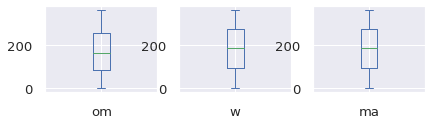

In [133]:
# to observe outliers from box plots
col1 = train [['om', 'w','ma']]
col1.plot(kind="box", subplots=True, layout=(6,6), figsize=(14,11))

We can observe no outlier for the above columns.

per_y          AxesSubplot(0.125,0.772143;0.110714x0.107857)
a           AxesSubplot(0.257857,0.772143;0.110714x0.107857)
diameter    AxesSubplot(0.390714,0.772143;0.110714x0.107857)
data_arc    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
dtype: object

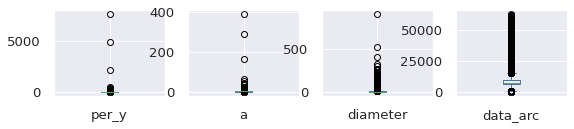

In [134]:
col2 = train[['per_y', 'a','diameter','data_arc']]
col2.plot(kind="box", subplots=True, layout=(6,6), figsize=(14,11))

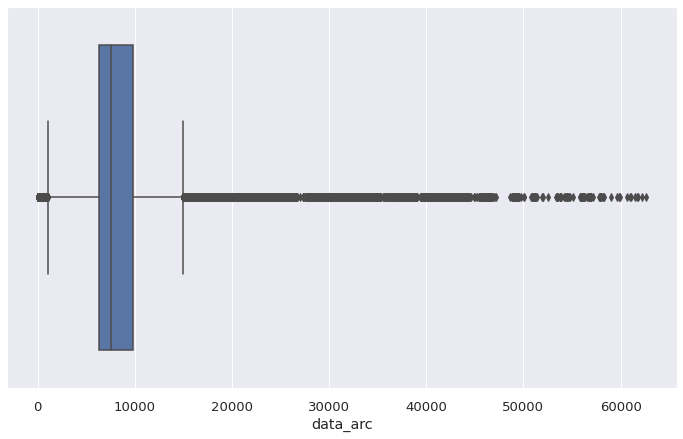

In [135]:
plt.figure(figsize=(12, 7))
sns.boxplot(train['data_arc'])


In [136]:
upper_limit = train['data_arc'].quantile(0.95)
lower_limit = train['data_arc'].quantile(0.05)
print(upper_limit,lower_limit)

23095.699999999997 636.7000000000016


In [137]:
#train = train[(train["data_arc"] < upper_limit) & (train["data_arc"] > lower_limit)]

In [138]:
#train['per_y']

We will find the upper and lower_limit for the columns that have outliers. Values of those columns lying beyond these values will be eliminated.
(Here I simply eliminate those rows with outliers since the input data is so large that ig it wouldn't matter)

In [139]:
upper_limit = train['per_y'].quantile(0.97)
lower_limit = train['per_y'].quantile(0.03)
print(upper_limit,lower_limit)

5.917709191506163 3.2784376141668186


In [140]:
#train = train[(train["per_y"] < upper_limit) & (train["per_y"] > lower_limit)]

In [141]:
#sns.boxplot(train['per_y'])

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82367 entries, 347325 to 22376
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               82367 non-null  float64
 1   e               82367 non-null  float64
 2   i               82367 non-null  float64
 3   om              82367 non-null  float64
 4   w               82367 non-null  float64
 5   per_y           82367 non-null  float64
 6   data_arc        82367 non-null  float64
 7   condition_code  82367 non-null  float64
 8   n_obs_used      82367 non-null  int64  
 9   H               82367 non-null  float64
 10  diameter        82367 non-null  float64
 11  moid            82367 non-null  float64
 12  class           82367 non-null  int64  
 13  n               82367 non-null  float64
 14  ma              82367 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 12.1 MB


In [143]:
upper_limit = train['a'].quantile(0.95)
lower_limit = train['a'].quantile(0.05)
print(upper_limit,lower_limit)

3.2174463970977385 2.245817414111698


In [144]:
#train = train[(train["a"] < upper_limit) & (train["a"] > lower_limit)]

In [145]:
upper_limit = train['n'].quantile(0.97)
lower_limit = train['n'].quantile(0.03)
print(upper_limit,lower_limit)

0.3006390236371831 0.16655537677025964


In [146]:
#train = train[(train["n"] < upper_limit) & (train["n"] > lower_limit)]

In [147]:
#sns.boxplot(train['n'])

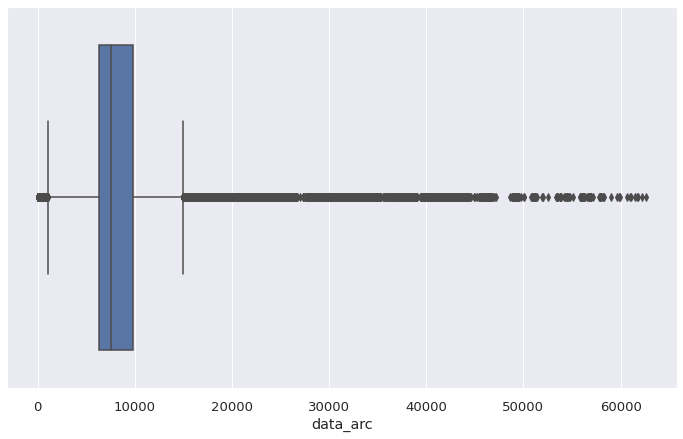

In [148]:
plt.figure(figsize=(12, 7))
sns.boxplot(train['data_arc'])

After outlier detection and finding relationship between some values, we performed data analysis.

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82367 entries, 347325 to 22376
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               82367 non-null  float64
 1   e               82367 non-null  float64
 2   i               82367 non-null  float64
 3   om              82367 non-null  float64
 4   w               82367 non-null  float64
 5   per_y           82367 non-null  float64
 6   data_arc        82367 non-null  float64
 7   condition_code  82367 non-null  float64
 8   n_obs_used      82367 non-null  int64  
 9   H               82367 non-null  float64
 10  diameter        82367 non-null  float64
 11  moid            82367 non-null  float64
 12  class           82367 non-null  int64  
 13  n               82367 non-null  float64
 14  ma              82367 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 12.1 MB


In [150]:
train.corr()['diameter'].abs().sort_values(ascending=False)

diameter          1.000000
H                 0.573740
data_arc          0.490634
n_obs_used        0.380836
moid              0.380744
n                 0.205545
class             0.178827
a                 0.140375
condition_code    0.073163
i                 0.056367
e                 0.052446
per_y             0.051683
ma                0.010264
om                0.006232
w                 0.005349
Name: diameter, dtype: float64

In [151]:
train['diameter']= train['diameter'].apply(np.log)

In [152]:
train.corr()['diameter'].abs().sort_values(ascending=False)
#gives better corelation

diameter          1.000000
H                 0.833194
n                 0.522337
data_arc          0.518503
moid              0.513624
n_obs_used        0.508018
class             0.381041
condition_code    0.210685
e                 0.183849
a                 0.166497
i                 0.099468
per_y             0.043916
ma                0.031764
om                0.006379
w                 0.005689
Name: diameter, dtype: float64

In [153]:
drop_col = ['om', 'w','ma']
train.drop(drop_col, axis=1, inplace=True)

# Model Building

We'll first perform train-test split on our data and then try some basic regression models (LGBM, XGB, SVM) and evaluate them using evaluation metrics (MSE, R2-Score).

In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [155]:
X = train.drop(columns=['diameter'], axis=1)
Y = train['diameter']

In [156]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

Linear Regression model

In [157]:
## linear regression model
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import PredictionError
model_lr = LinearRegression( )
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

###Scoring
score_lr = r2_score(y_pred,y_test)
print('R2 score: ', score_lr)
mse_lr = mean_squared_error(y_pred,y_test)
print('MSE : ',mse_lr)

R2 score:  0.7275350985102611
MSE :  0.08958594802791349


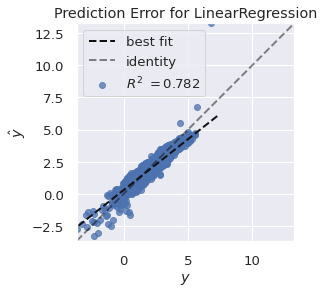

In [158]:
visualizer = PredictionError(model_lr)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### XGBoost Model

In [159]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
model_xgb = XGBRegressor()

In [160]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [5, 6, 8, 10, 12, 15,17],
 "min_child_weight" : [ 3, 5, 7, 9, 10 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=4,verbose=3)

In [161]:
random_search.fit(x_train,y_train)
random_search.best_estimator_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


[13:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=8,
             min_child_weight=9)

In [162]:
random_search.best_params_

{'min_child_weight': 9,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [163]:
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=10, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
from sklearn.model_selection import cross_val_score
score=cross_val_score(model_xgb,x_train,y_train,cv=4)

In [164]:
from statistics import mean
score.mean()

0.8421086438865457

### XGB without parameter tuning

In [165]:
#xgboost model
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred2 =  model_xgb.predict(x_test)
score_xgb = r2_score(y_pred2,y_test)
print('R2 score: ', score_xgb)
mse_xgb = mean_squared_error(y_pred2,y_test)
print('MSE : ',mse_xgb)

[13:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score:  0.8042475599242422
MSE :  0.0676152311676929


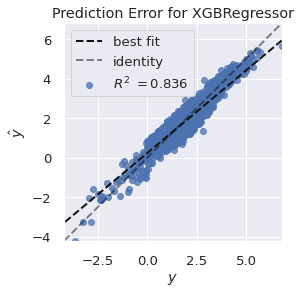

In [166]:
visualizer = PredictionError(model_xgb)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

We can observe that parameter tuning gives better r2 score for XGBRegressor model

### LGBM Model

In [167]:
#lgbm model
# build the lightgbm model
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(x_train, y_train)
y_pred3=model_lgb.predict(x_test)
score_lgbm = r2_score(y_pred3,y_test)
print('R2 score: ', score_lgbm)
mse_lgbm = mean_squared_error(y_pred3,y_test)
print('MSE : ',mse_lgbm)


R2 score:  0.826334954870002
MSE :  0.061299095908218165


### LGBM Model using hyperparameter tuning

In [168]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {"n_estimators" : [200, 500],
              "max_depth" : [5, 6, 9],
              "learning_rate" : [0.01, 0.1],
              "gamma": [1, 0.1],
              "kernel": ['rbf']} 
  
model_lgb = GridSearchCV(lgb.LGBMRegressor(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
model_lgb.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.810 total time=   1.6s
[CV 2/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.805 total time=   1.6s
[CV 3/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.809 total time=   1.6s
[CV 4/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.811 total time=   1.6s
[CV 5/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.811 total time=   1.6s
[CV 1/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.839 total time=   3.6s
[CV 2/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.832 total time=   3.8s
[CV 3/5] END gamma=1, kernel=rbf, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.837 total time=   4.7s
[C

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'gamma': [1, 0.1], 'kernel': ['rbf'],
                         'learning_rate': [0.01, 0.1], 'max_depth': [5, 6, 9],
                         'n_estimators': [200, 500]},
             verbose=3)

In [169]:
print(model_lgb.best_estimator_) 
print(model_lgb.best_params_) 
print(model_lgb.best_score_) 

LGBMRegressor(gamma=1, kernel='rbf', max_depth=9, n_estimators=500)
{'gamma': 1, 'kernel': 'rbf', 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
0.8515973348457793


We can observe that a good relative score is obtained by using hyper-paramter tuning with Grid Search CV. 

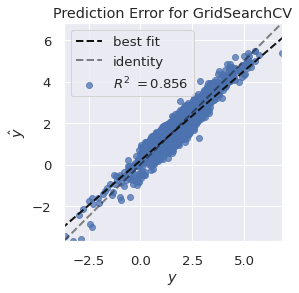

In [170]:
visualizer = PredictionError(model_lgb)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### SVM Model

In [171]:
from sklearn import svm
model_svm= svm.SVR()

model_svm.fit(x_train,y_train)

y_pred4 = model_svm.predict(x_test)
score4 = r2_score(y_pred4,y_test)
print("R2 score: ",  score4)
mse_svm = mean_squared_error(y_test, y_pred4, squared=False)
print("MSE:", mse_svm )

R2 score:  0.7874455722607113
MSE: 0.26916574670170507


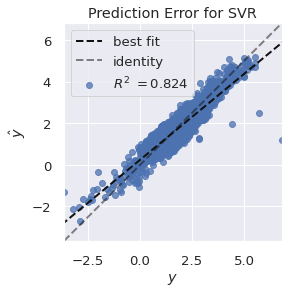

In [172]:
visualizer = PredictionError(model_svm)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

Based on the analysis of model it can be said that SVM gives the worst fitting, whereas LGBM gives the best fitting followed by XGBoost, linear regression resp.

## Week-4 More models

Some more models are tried

### KNN Model

In [173]:
from sklearn.neighbors import KNeighborsRegressor  
model_knn= KNeighborsRegressor (n_neighbors=5, metric='minkowski', p=2 )  
model_knn.fit(x_train, y_train)
y_pred5 = model_knn.predict(x_test)
score5 = r2_score(y_pred5,y_test)
print("R2 score: ",  score5)
mse_knn = mean_squared_error(y_test, y_pred5, squared=False)
print("MSE:", mse_knn )

R2 score:  0.7921188742052334
MSE: 0.26911457799983973


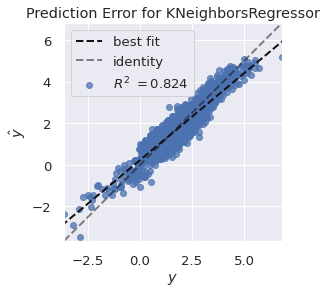

In [174]:
visualizer = PredictionError(model_knn)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Decision tree

In [175]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=2)
model_dt.fit(x_train, y_train)
y_pred6 = model_dt.predict(x_test)
score6 = r2_score(y_pred6,y_test)
print("R2 score: ",  score6)
mse_dt = mean_squared_error(y_test, y_pred6, squared=False)
print("MSE:", mse_dt )

R2 score:  0.7161845924977575
MSE: 0.3480874040125596


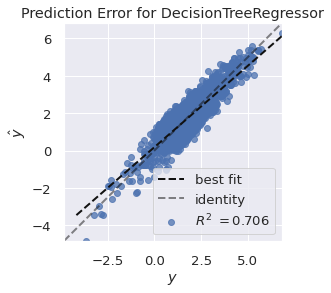

In [176]:
visualizer = PredictionError(model_dt)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Random Forest Regressor

In [177]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth=35, n_estimators=40)
model_rf.fit(x_train, y_train)
y_pred7 = model_rf.predict(x_test)
score7= r2_score(y_pred7,y_test)
print("R2 score: ",  score7)
mse_rf = mean_squared_error(y_test, y_pred7, squared=False)
print("MSE:", mse_rf)

R2 score:  0.8279022397083184
MSE: 0.24919845186205972


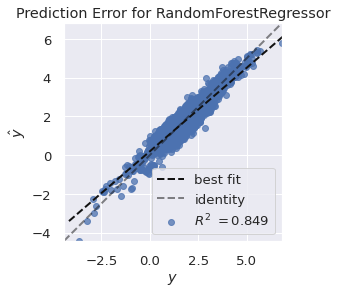

In [178]:
visualizer = PredictionError(model_rf)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### MLP Regressor

In [179]:
from sklearn.neural_network import MLPRegressor
model_mlp=MLPRegressor(max_iter=2000,warm_start=True,activation='relu')
model_mlp.fit(x_train,y_train)
MLPRegressor(activation='relu', max_iter=2000, warm_start=True)
model_mlp.score(x_test,y_test)

0.8385244633300613

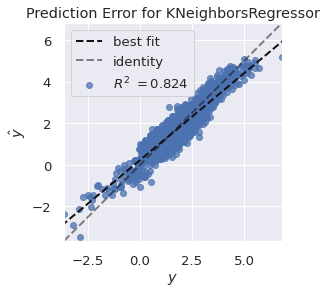

In [180]:
visualizer = PredictionError(model_knn)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

### Gradient Boosting

In [181]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(random_state=0)
model_gb.fit(x_train,y_train)
y_pred8 = model_gb.predict(x_test)
score8= r2_score(y_pred8,y_test)
print("R2 score: ",  score8)
mse_rf = mean_squared_error(y_test, y_pred8, squared=False)
print("MSE:", mse_rf)

R2 score:  0.8041412198739868
MSE: 0.25994231702668724


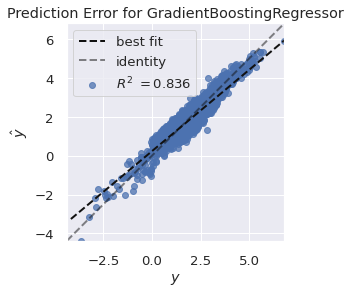

In [182]:
visualizer = PredictionError(model_gb)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Neural Network Training

In [183]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [184]:
#We build a sequential model to add layer by layer bby using keras
model_keras = Sequential()
optimizer = RMSprop(0.01) #0.01 is the learning rate
model_keras.add(Dense(20, input_dim = x_train.shape[1], activation = 'relu'))
model_keras.add(Dense(15,  activation = 'relu'))
model_keras.add(Dense(1,  activation = 'relu'))

In [185]:
model_keras.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['accuracy'])
model_keras.fit(x_train,y_train,epochs =50, batch_size=120,verbose=False)

In [188]:
model_keras.compile(
   loss = 'mse', 
   optimizer = RMSprop(), 
   metrics = ['mean_absolute_error']
)
history = model_keras.fit(
   x_train, y_train,    
   batch_size=120, 
   epochs = 100, 
   verbose = 1, 
   validation_split = 0.3
)

Epoch 1/100
385/385 [==============================] - 4s 5ms/step - loss: 0.0701 - mean_absolute_error: 0.1957 - val_loss: 0.0718 - val_mean_absolute_error: 0.1974
Epoch 2/100
385/385 [==============================] - 1s 3ms/step - loss: 0.0701 - mean_absolute_error: 0.1956 - val_loss: 0.0721 - val_mean_absolute_error: 0.1981
Epoch 3/100
385/385 [==============================] - 2s 5ms/step - loss: 0.0700 - mean_absolute_error: 0.1956 - val_loss: 0.0718 - val_mean_absolute_error: 0.1975
Epoch 4/100
385/385 [==============================] - 2s 5ms/step - loss: 0.0700 - mean_absolute_error: 0.1956 - val_loss: 0.0719 - val_mean_absolute_error: 0.1976
Epoch 5/100
385/385 [==============================] - 2s 4ms/step - loss: 0.0701 - mean_absolute_error: 0.1954 - val_loss: 0.0719 - val_mean_absolute_error: 0.1985
Epoch 6/100
385/385 [==============================] - 1s 3ms/step - loss: 0.0700 - mean_absolute_error: 0.1955 - val_loss: 0.0719 - val_mean_absolute_error: 0.1980
Epoch 7/10

In [189]:
y_pred9 = model_keras.predict(x_test)
score9= r2_score(y_pred9,y_test)
print("R2 score: ",  score9)
mse_keras = mean_squared_error(y_test, y_pred9, squared=False)
print("MSE:", mse_keras)

515/515 [==============================] - 1s 2ms/step
R2 score:  0.792099745954705
MSE: 0.2634387046093156


## Conclusion

Various models were built and their scores were obtained. It is observed that for the same training and test data some models give relatively much better accuracy than other. The same model gives better output when it's hyper-parameters are tuned.